In [1]:
#konuyla ilgili daha çok tanım ve grafik bulabileceğimiz kaynak ve siteler:

"""
https://scikit-learn.org/0.18/auto_examples/svm/plot_svm_regression.html

https://medium.com/@yigitsener/destek-vektör-makineleri-support-vector-machine-svm-çalışma-mantığı-ve-python-uygulaması-992163ff3eec

"""

'\nhttps://scikit-learn.org/0.18/auto_examples/svm/plot_svm_regression.html\n\nhttps://medium.com/@yigitsener/destek-vektör-makineleri-support-vector-machine-svm-çalışma-mantığı-ve-python-uygulaması-992163ff3eec\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#verinin çekilmesi
veriler=pd.read_csv("maaslar.csv")
veriler.head(5)

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


POLİNOMSAL REGRESYON ŞABLONU 

In [4]:
#değişkenleri ayırmak.. y=a+bx^2 ifadesi..
x=veriler.iloc[:,1:2]
x
y=veriler.iloc[:,-1:]


#Eğer ben x.values yazarsam ben bunları np.array'lere çevirmiş olurum. 



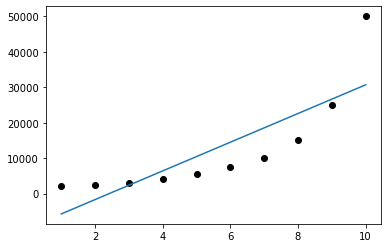

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()  #bir kapsül oluşturalım.
lin_reg.fit(x.values,y.values) #kolonların değerlerini alalım ki aşağıdaki gösterimde sorun oluşmasın.

plt.scatter(x.values,y.values,color="black")
plt.plot(x,lin_reg.predict(x.values)) #tahmin etme (predict.)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


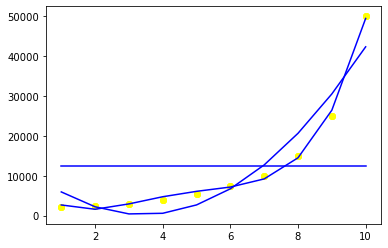

In [6]:
from sklearn.preprocessing import PolynomialFeatures   #bunu kullanıcaz.
for a in range(0,5,2): #for'a aldım..

    poly_reg=PolynomialFeatures(a) #bir kapsül oluşturdum ve degree(Derecesini 2 yapalım buna istediğimi verebilirim ama benim problemime uygun olmalı)

    x_poly=poly_reg.fit_transform(x.values) #x'in değerlerini polinomal dünyaya çevirme.

    print(x_poly)

    #şimdi yine linearRegression kapsülünü kullanarak. y=a^0+bx+cx^2 ye göre y'yi öğren dicez.

    lin_reg2=LinearRegression()
    lin_reg2.fit(x_poly,y)

    #bunu görselleştirelim..
    plt.scatter(x.values,y.values,color="yellow") #noktalasal bir gösterime sahip oluyor.
    plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x.values)),color="blue") #tahmin edeceğin her durumu bu dünyada göster: Dünya ---->poly_reg.fit_transform(x.values)

In [7]:
print(lin_reg.predict([[11]]))# Eğer eğitim seviyesi 11 ise ne kadar maaş verir. Makine öğrenmesinin cevabı

print(lin_reg.predict([[6.6]]))


[[34716.66666667]]
[[16923.33333333]]


In [8]:
#print(lin_reg2.predict([[11]])) bu şekilde çalıştırırsan bu hatayı alırsın ---> matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

"""Bunu polinomsal dünyaya çevirmen gerekiyor."""

print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))

[[89041.66666667]]
[[8146.9948718]]


SUPPORT VECTOR MACHINE

c:\Users\yusuf\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


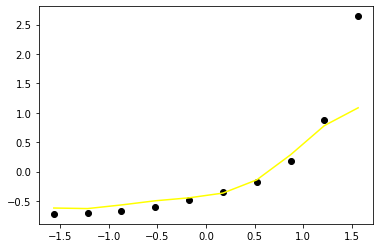

In [9]:
#şimdi StandarScaler çağıralım.BU ÖNEMLİ BİR NOKTA.
#Normalization (Normalleştirme İşlemleri)

from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(x.values)
sc2=StandardScaler()
y_olcekli=sc2.fit_transform(y.values)



from sklearn.svm import SVR

svr_reg=SVR(kernel='rbf') #bu ikisi arasındaki ilişkiyi kurmasını istiyoruz.
svr_reg.fit(x_olcekli,y_olcekli) 

plt.scatter(x_olcekli,y_olcekli,color='black')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color="yellow") #çizgimizde x_olcekli ekseninde bir çizgi çizecek

In [10]:
#peki listenin dışında olan bazı değerleri rbf ile tahmin ettirmeye çalışalım..

print(svr_reg.predict([[6.6]]))

[0.01150915]


DECISION TREE

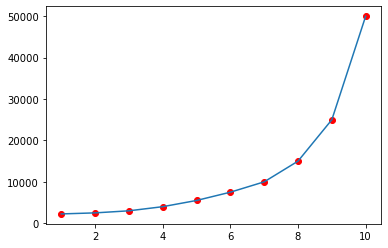

In [16]:
from sklearn.tree import DecisionTreeRegressor

r_dt=DecisionTreeRegressor(random_state=0) #bir kapsül oluşturalım

r_dt.fit(x.values,y.values) #x'ten y'leri öğren diyoruz.

plt.scatter(x.values,y.values,color="red")#bize bu uzayı çiz diyoruz.

plt.plot(x.values,r_dt.predict(x.values))


In [15]:
#başka tahminler yapılması..

print(r_dt.predict([[16]]))
print(r_dt.predict([[6.6]])) 

#Outputlaradan da anlaşılacağı üzere belli kısımda kaldığı sürece hep aynı değerlere söz konusu oluyor..


[50000.]
[10000.]
